In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import io

from google.colab import files
  
  
uploaded = files.upload()
  
df = pd.read_csv(io.BytesIO(uploaded['titanicfinal.csv']))
print(df)

Saving titanicfinal.csv to titanicfinal.csv
      Unnamed: 0  pclass  survived  ...  ticket      fare  embarked
0              0       1         1  ...   24160  211.3375         S
1              1       1         1  ...  113781  151.5500         S
2              2       1         0  ...  113781  151.5500         S
3              3       1         0  ...  113781  151.5500         S
4              4       1         0  ...  113781  151.5500         S
...          ...     ...       ...  ...     ...       ...       ...
1302        1304       3         0  ...    2665   14.4542         C
1303        1305       3         0  ...    2665   14.4542         C
1304        1306       3         0  ...    2656    7.2250         C
1305        1307       3         0  ...    2670    7.2250         C
1306        1308       3         0  ...  315082    7.8750         S

[1307 rows x 11 columns]


In [6]:
len(df)

1307

In [7]:
df1=df.drop(['Unnamed: 0'], axis = 1)

In [8]:
df1.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


In [9]:
df1.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'embarked'],
      dtype='object')

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1307 entries, 0 to 1306
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1307 non-null   int64  
 1   survived  1307 non-null   int64  
 2   name      1307 non-null   object 
 3   sex       1307 non-null   object 
 4   age       1307 non-null   float64
 5   sibsp     1307 non-null   int64  
 6   parch     1307 non-null   int64  
 7   ticket    1307 non-null   object 
 8   fare      1307 non-null   float64
 9   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.2+ KB


In [12]:
df1.describe()

,pclass,survived,age,sibsp,parch,fare
count,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000
mean,2.296863,0.381025,29.850348,0.499617,0.385616,33.224011
std,0.836942,0.485825,12.860391,1.042273,0.866092,51.746164
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


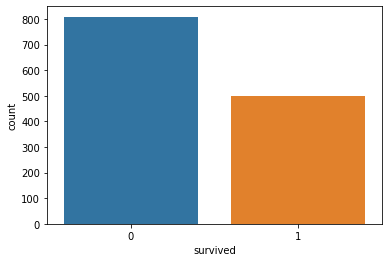

In [14]:
sns.countplot(x='survived',data=df1)

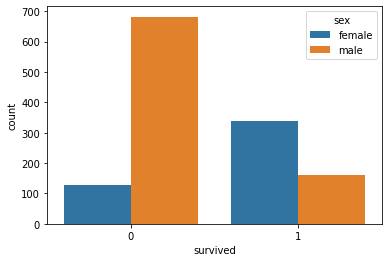

In [15]:
sns.countplot(x='survived',data=df1,hue='sex')

In [16]:
df1.isna().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [17]:
gender=pd.get_dummies(df1['sex'],drop_first=True)
df1['gender']=gender
df1.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,gender
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0


In [18]:
df1.drop(['name','sex','ticket','embarked'],axis=1,inplace=True)

In [19]:
df1.head(5)

,pclass,survived,age,sibsp,parch,fare,gender
0,1,1,29.0000,0,0,211.3375,0
1,1,1,0.9167,1,2,151.5500,1
2,1,0,2.0000,1,2,151.5500,0
3,1,0,30.0000,1,2,151.5500,1
4,1,0,25.0000,1,2,151.5500,0


In [21]:
x=df1[['pclass','age','sibsp','parch','fare','gender']]
y=df1['survived']

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
predict=lr.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,231,38
Actual Yes,55,108


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       269
           1       0.74      0.66      0.70       163

    accuracy                           0.78       432
   macro avg       0.77      0.76      0.77       432
weighted avg       0.78      0.78      0.78       432

